In [1]:
## import libraries for handling data
import numpy as np
import pandas as pd

In [2]:
test_data = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")
train_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

In [2]:
## take Kaggle's data csv file and extract a pandas dataframe

# read in test and train data

# DEFINE FUNCTION TO READ FILES FROM GITHUB REPOS
def read_file(url):

    """
    Takes GitHub url as an argument,
    pulls CSV file located @ github URL.

    """

    url = url + "?raw=true"
    df = pd.read_csv(url)
    return df


# READ FILE FROM GITHUB REPO
url = "https://github.com/john-adeojo/AdvancedRegression/blob/main/test.csv"
test_data = read_file(url)

# READ ASTRONAUT MISSION FILE FROM GITHUB
url = "https://github.com/john-adeojo/AdvancedRegression/blob/main/train.csv"
train_data = read_file(url)



train_data.head()

print("Test", test_data.shape, "Train", train_data.shape)

Test (1459, 80) Train (1460, 81)


In [6]:
## checking data conversion

train_data.head()
test_data.head()

print("Train", train_data.shape, "Test", test_data.shape)

Train (1460, 81) Test (1459, 80)


# Cleaning up Data

In [8]:
## data parameters

print("Rows: ", train_data.shape[0])
print("Columns: ", train_data.shape[1])
print("\nFeatures: \n", train_data.columns.tolist())
print("\nMissing values: ", train_data.isnull().sum().values.sum())
print("\nUnique values: \n", train_data.nunique())

print("\nTest Features: \n", test_data.columns.tolist())

print("Train", train_data.shape, "Test", test_data.shape)

Rows:  1460
Columns:  81

Features: 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch

In [10]:
## summary of info of the training data
train_data.info()

## remove duplicates from the training data

train_data.duplicated(subset = None, keep = "first")

## printing shape of data to see how many duplicates removed
print("Train", train_data.shape, "Test", test_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# next I'll check for missing values in training data
pd.options.display.min_rows = 115
train_data.isnull().sum().sort_values(ascending=False)

print("Test", test_data.shape, "Train", train_data.shape)

Test (1459, 80) Train (1460, 81)


In [12]:
# Lets get info on the missing values and decide what we will do with them

missing = [
    "PoolQC",
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu",
    "LotFrontage",
    "GarageCond",
    "GarageType",
    "GarageYrBlt",
    "GarageFinish",
    "GarageQual",
    "BsmtExposure",
    "BsmtFinType2",
    "BsmtFinType1",
    "BsmtCond",
    "BsmtQual",
    "MasVnrArea",
    "MasVnrType",
    "Electrical",
]

train_data[missing].info()

# Assume poolQC missing values are due to property not having pool (which makes sense for the data )
values = {
    "PoolQC": "No Pool",
    "MiscFeature": "No Feature",
    "Alley": "No alley access",
    "Fence": "No Fence",
    "FireplaceQu": "No Fireplace",
    "GarageCond": "No Garage",
    "GarageType": "No Garage",
    "GarageArea": 0,
    "GarageYrBlt": "None built",
    "GarageFinish": "No Garage",
    "GarageQual": "No Garage",
    "BsmtExposure": "No Basement",
    "BsmtFinType2": "Not Applicable",
    "BsmtFinType1": "Not Applicable",
    "BsmtCond": "No Basement",
    "BsmtQual": "No Basement",
    "MasVnrArea": 0,
    "MasVnrType": "No Veneer",
    "LotFrontage": 0,
}

train_data.fillna(value=values, inplace=True)
test_data.fillna(value=values, inplace=True)

train_data.isna().sum().sort_values(ascending=False)

# for other missing categories we will replace with the mode
features = train_data.select_dtypes(include=["object"]).columns

for features in features:
    train_data[features].fillna(train_data[features].mode()[0], inplace=True)
    test_data[features].fillna(test_data[features].mode()[0], inplace=True)


# some basement values are set to NANs when they should be zero
Basementmetrics = [
    "BsmtHalfBath",
    "BsmtFullBath",
    "BsmtFinSF1",
    "GarageCars",
    "TotalBsmtSF",
    "BsmtUnfSF",
    "BsmtFinSF2",
]

for Basementmetrics in Basementmetrics:
    test_data.loc[(test_data[Basementmetrics].isnull()), Basementmetrics] = 0
    train_data.loc[(train_data[Basementmetrics].isnull()), Basementmetrics] = 0

# mising info for Garage cars should be replaced
test_data.loc[(test_data.GarageCars.isnull()), "GarageCars"] = 0
train_data.loc[(train_data.GarageCars.isnull()), "GarageCars"] = 0


print("Test", test_data.shape, "Train", train_data.shape)
print(features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   FireplaceQu   770 non-null    object 
 5   LotFrontage   1201 non-null   float64
 6   GarageCond    1379 non-null   object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  BsmtExposure  1422 non-null   object 
 12  BsmtFinType2  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  BsmtQual      1423 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  MasVnrType    1452 non-null   object 
 18  Electrical    1459 non-null 

In [13]:
print(features)

print(train_data.select_dtypes(include=["object"]).columns)

SaleCondition
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [14]:
# Change variable types

# Year built is currently an integer we should treat this as a category for the purpose of this task

train_data.YearBuilt = train_data.YearBuilt.astype(str)
test_data.YearBuilt = test_data.YearBuilt.astype(str)

train_data.YrSold = train_data.YrSold.astype(str)
test_data.YrSold = test_data.YrSold.astype(str)

train_data.GarageYrBlt = train_data.GarageYrBlt.astype(str)
test_data.GarageYrBlt = test_data.GarageYrBlt.astype(str)

train_data.YearRemodAdd = train_data.YearRemodAdd.astype(str)
test_data.YearRemodAdd = test_data.YearRemodAdd.astype(str)


# MSSUbCLass, Overallcond & OverallQual: we will decode this to avoid numeric mix-up
MSSUbCLass = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}


OverallQualCond = {
    10: "Very Excellent",
    9: "Excellent",
    8: "Very Good",
    7: "Good",
    6: "Above Average",
    5: "Average",
    4: "Below Average",
    3: "Fair",
    2: "Poor",
    1: "Very Poor",
}


train_data.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)
test_data.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)


#print("Test", Test.shape, "Train", Train.shape)

In [15]:
print("Test", test_data.shape, "Train", train_data.shape)

Test (1459, 80) Train (1460, 81)


# Data visualisation & Exploration

In [16]:
# let's do some descriptive statistics on our data to make sure nothing looks unusual
pd.set_option("display.max_columns", None)
train_data.describe()
# Train.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,57.623288,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890
std,421.610009,34.664304,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883
min,1.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,365.750000,42.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,730.500000,63.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000


In [17]:
## import packages for data visualization

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

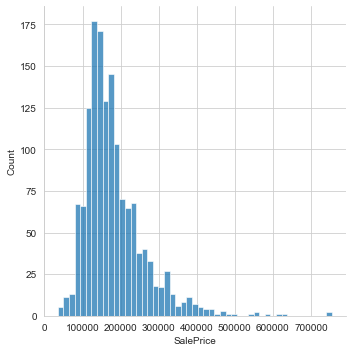

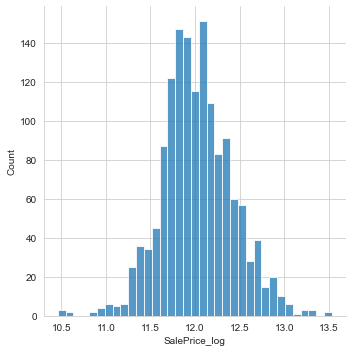

In [18]:
## we now graph the data to get a feel for it
## sales price his left skewed, which makes sense, but we want to minimize the effects of the outliers on machine learning
## so we will apply a log transformation to the data

x = train_data.SalePrice
sns.set_style('whitegrid')
sns.displot(x)
plt.show()

train_data['SalePrice_log'] = np.log(train_data.SalePrice)
x = train_data.SalePrice_log
sns.displot(x)
plt.show()

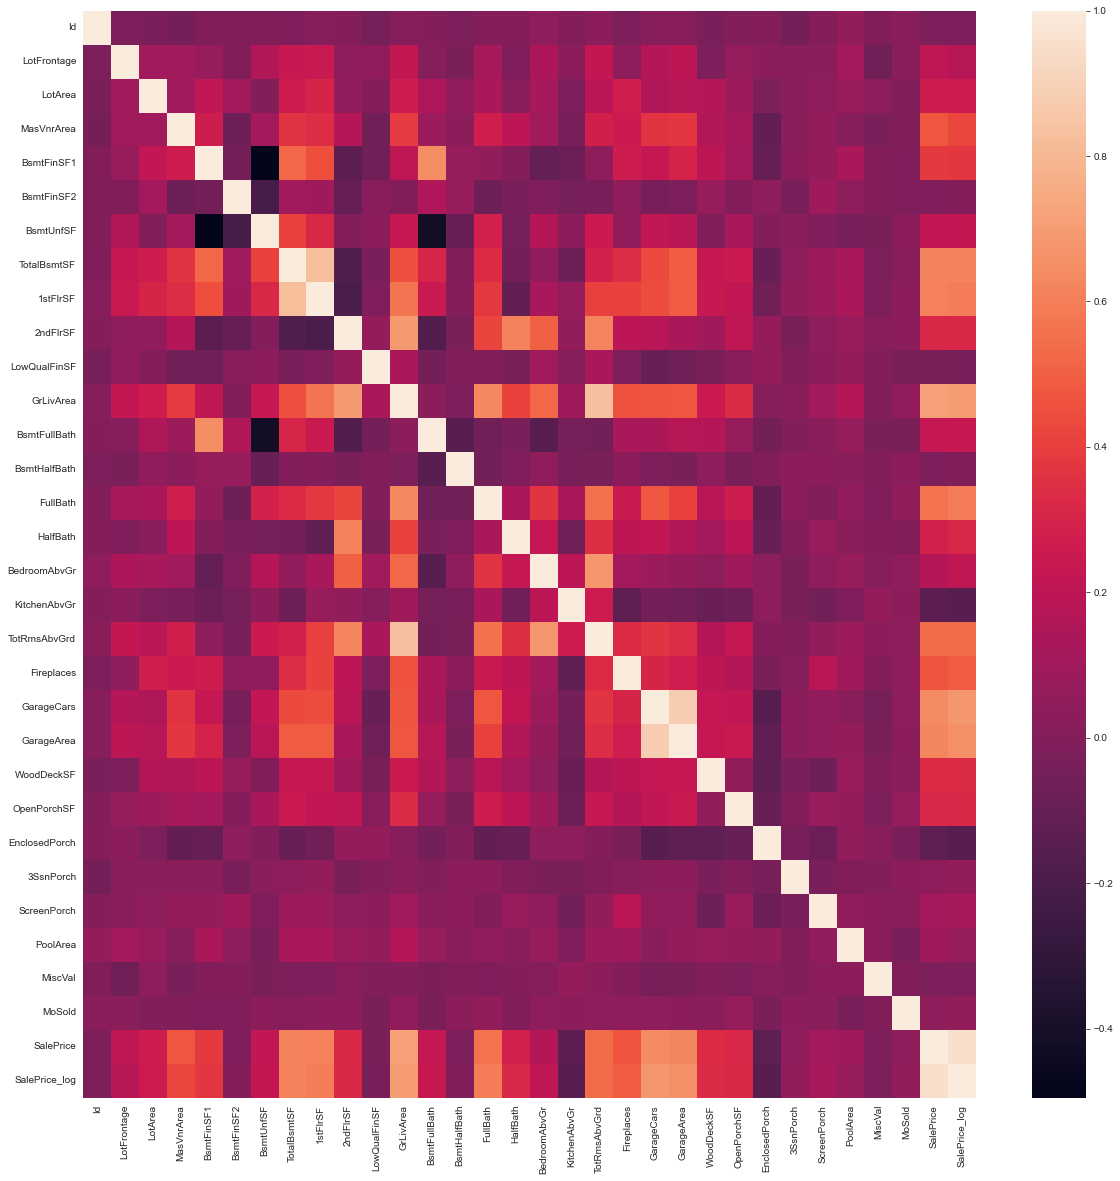

In [19]:
## next we explore the correlations in our data using a heat map
## we use the Pearson correlation
plt.figure(figsize = (20,20))
sns.heatmap(train_data.corr())
plt.savefig("pearsonsmep.png")

One reason to make a correlation heatmap as we did above is to figure out which features actually affect the feature we are trying to predict. In this case, we are trying to predict the sale price of a house. As the heatmap indicates, there is a positive correlation between the price and features, such as, the size of the garage, the number of total rooms above ground, the square footage, etc. On the other hand, the heatmap also shows that certain features seem to not affect the sale price of a house that much, e.g. the pool area or whether or not there is a screened porch.

/var/folders/7c/74lq1g6j7j13bq_ryks4tj2h0000gp/T/ipykernel_7281/2474926524.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,10))


<Figure size 720x720 with 0 Axes>

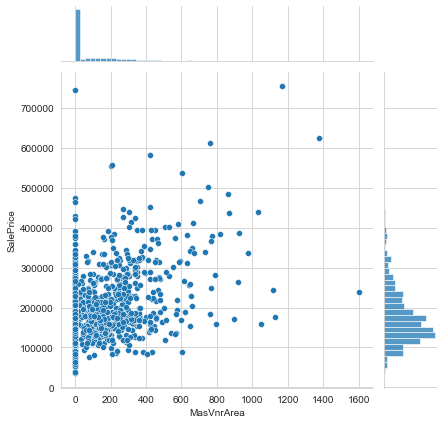

<Figure size 720x720 with 0 Axes>

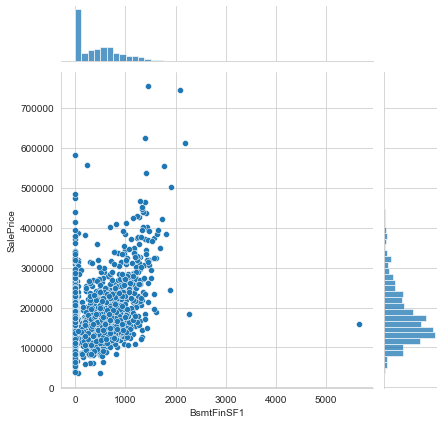

<Figure size 720x720 with 0 Axes>

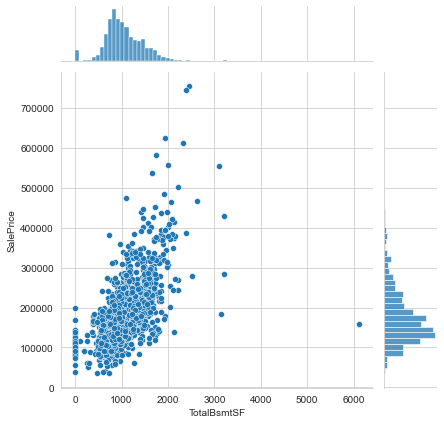

<Figure size 720x720 with 0 Axes>

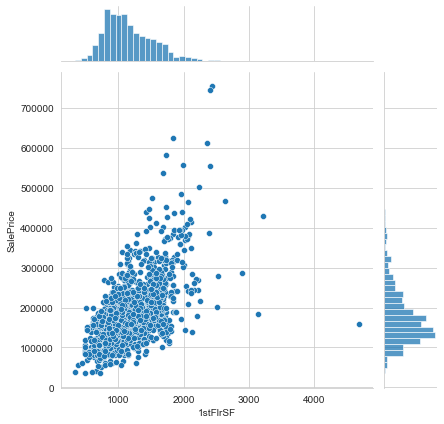

<Figure size 720x720 with 0 Axes>

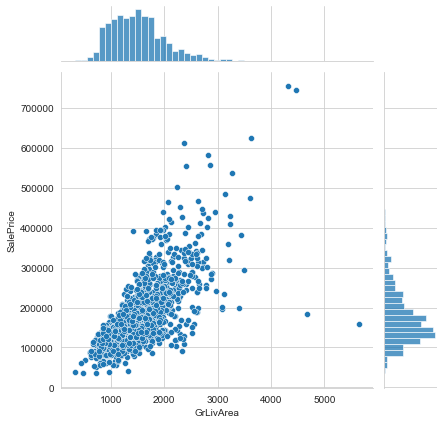

<Figure size 720x720 with 0 Axes>

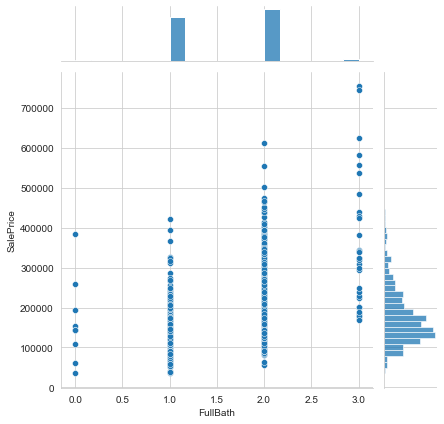

<Figure size 720x720 with 0 Axes>

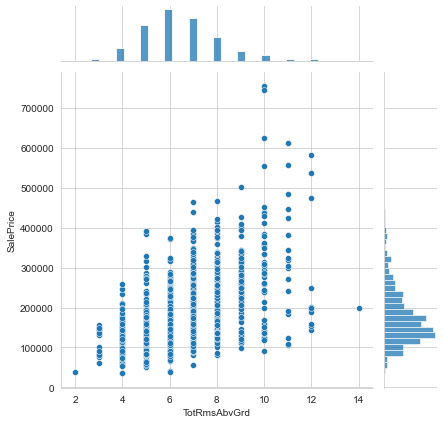

<Figure size 720x720 with 0 Axes>

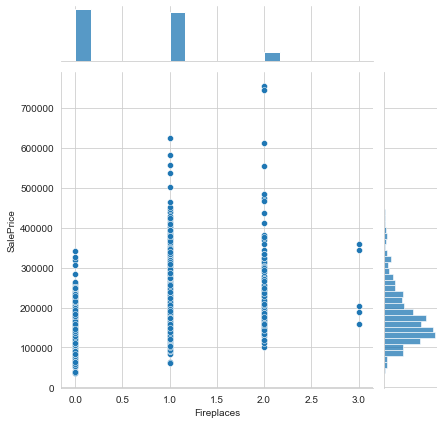

<Figure size 720x720 with 0 Axes>

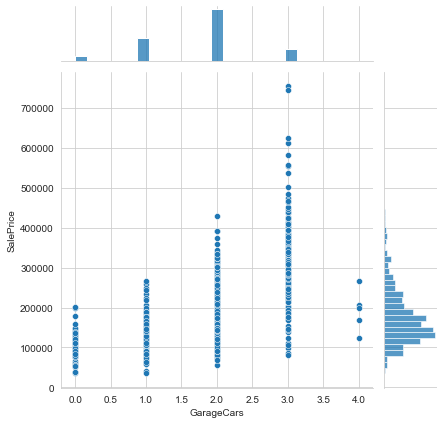

<Figure size 720x720 with 0 Axes>

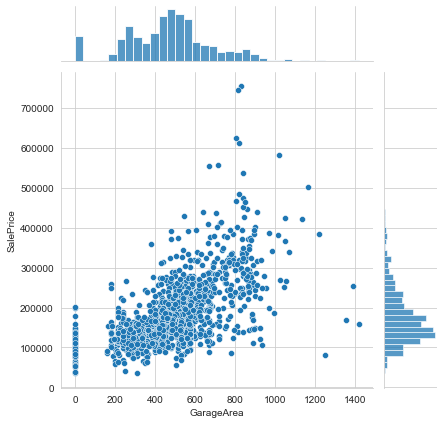

<Figure size 720x720 with 0 Axes>

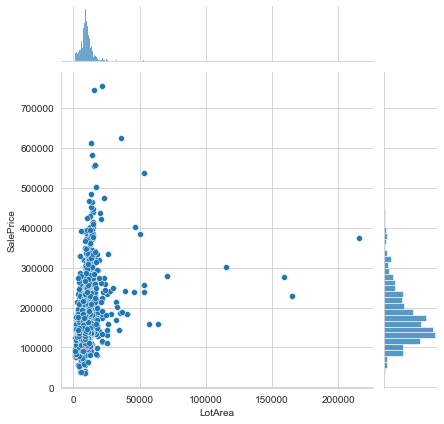

<Figure size 720x720 with 0 Axes>

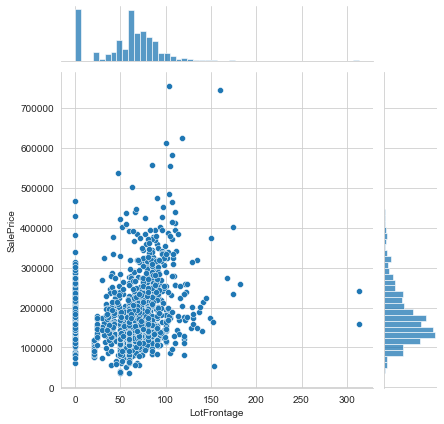

In [20]:
## next we graph some histograms and scatter plots to look at correlated features in more detail

y = train_data.SalePrice
features = [
    "MasVnrArea",
    "BsmtFinSF1",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "FullBath",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars",
    "GarageArea",
    "LotArea",
    "LotFrontage",
]

for feature in features:
    sns.set_style('whitegrid')
    plt.figure(figsize = (10,10))
    x = train_data[feature]
    sns.jointplot(x=x, y=y, data = train_data)

/Users/dominicculver/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


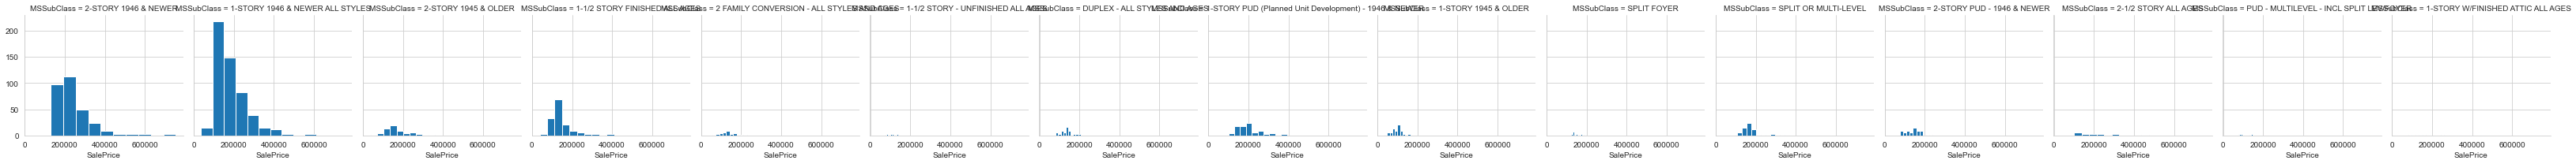

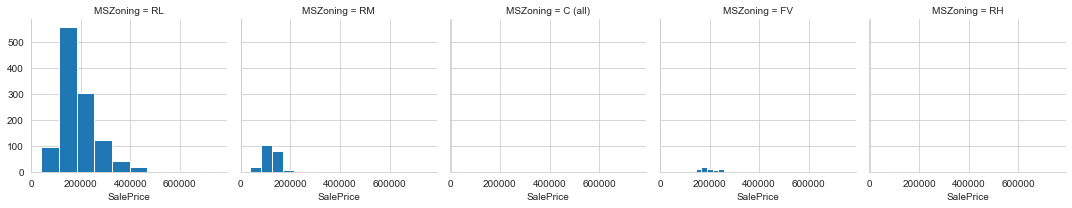

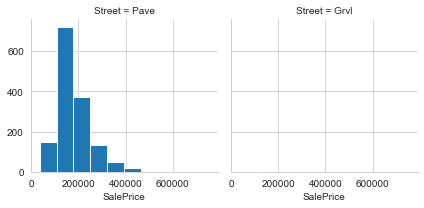

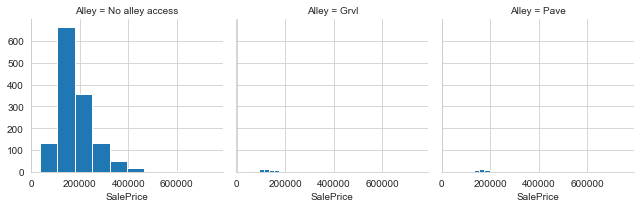

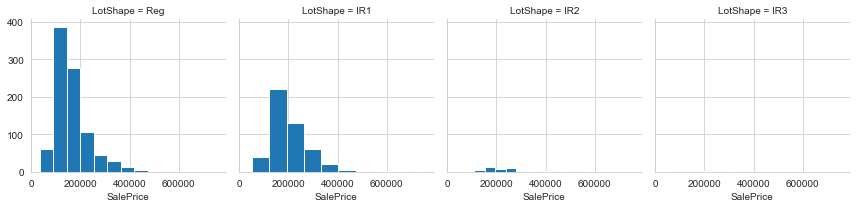

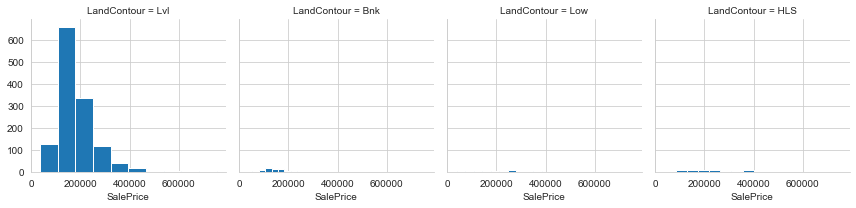

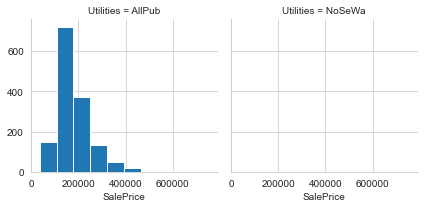

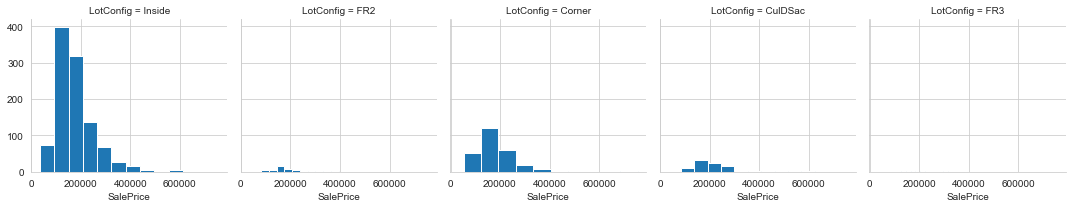

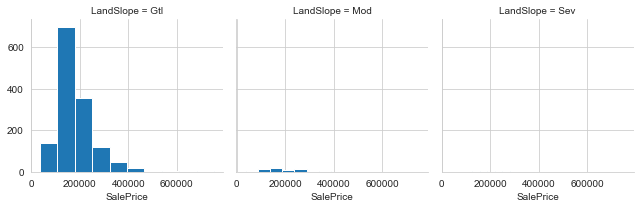

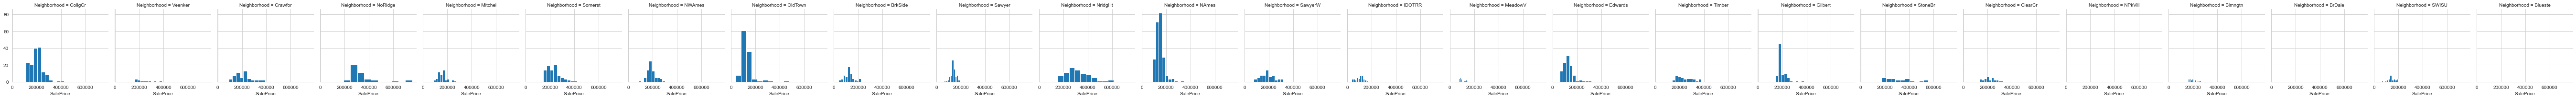

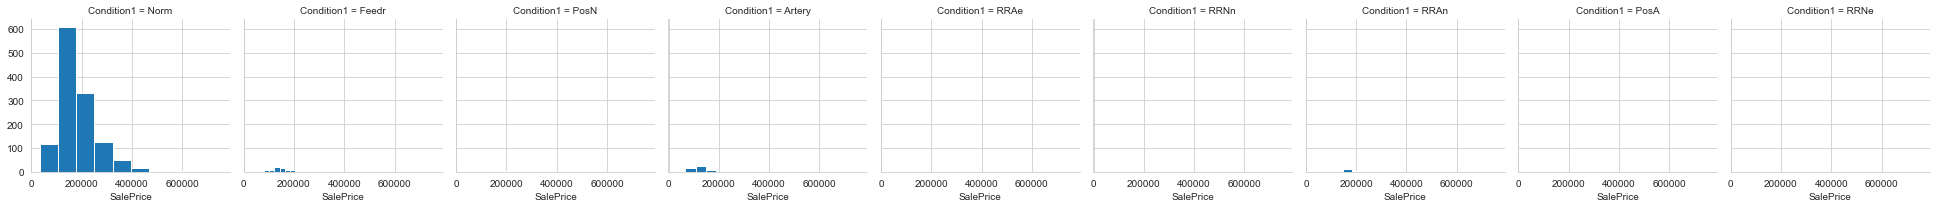

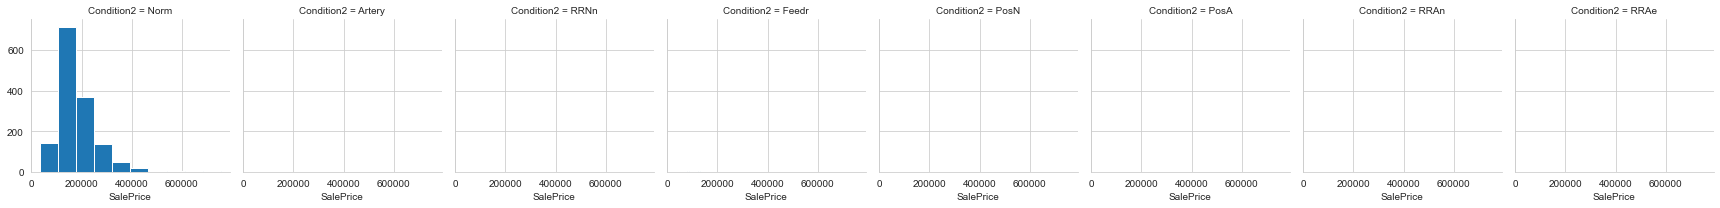

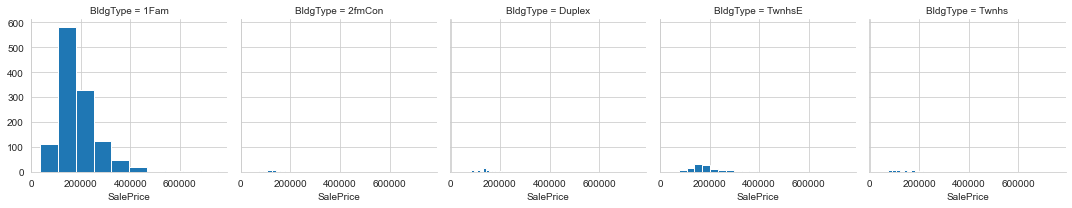

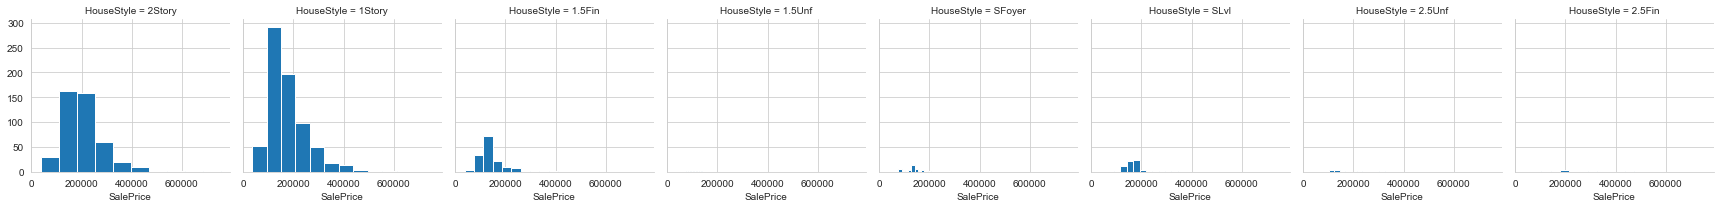

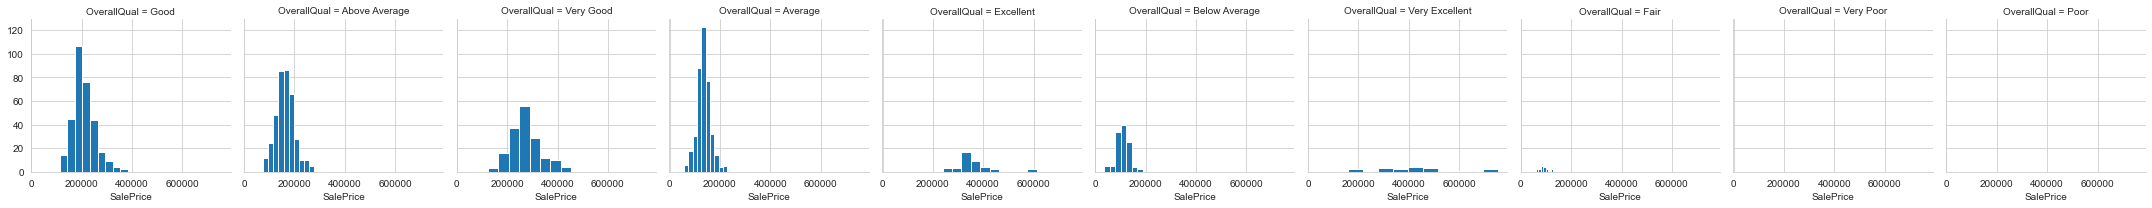

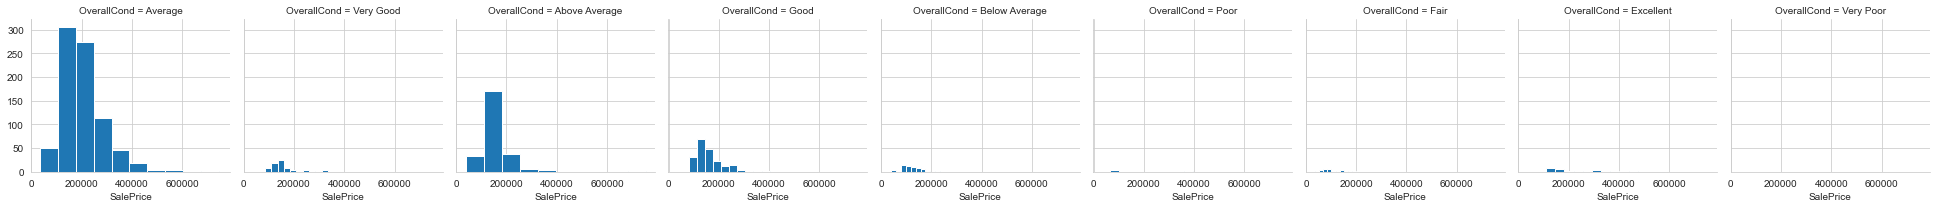

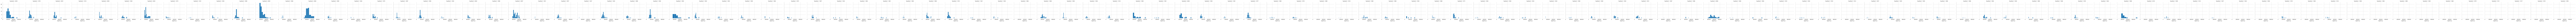

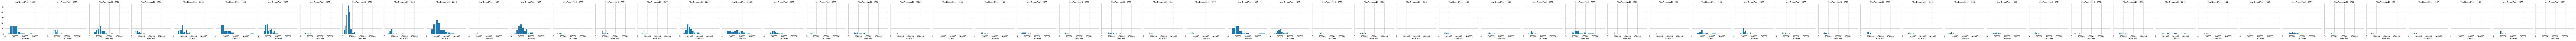

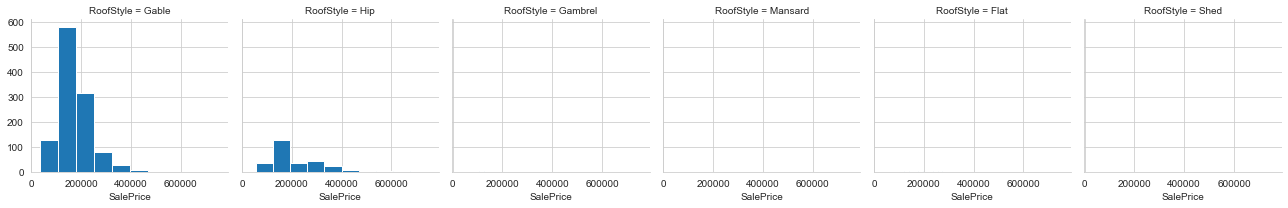

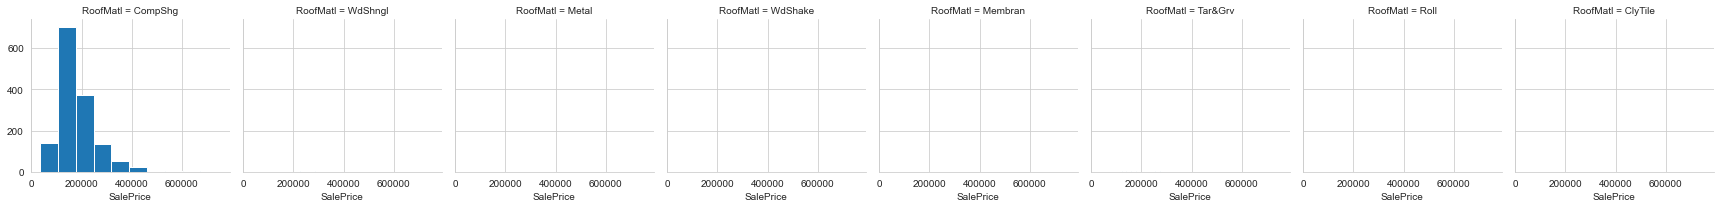

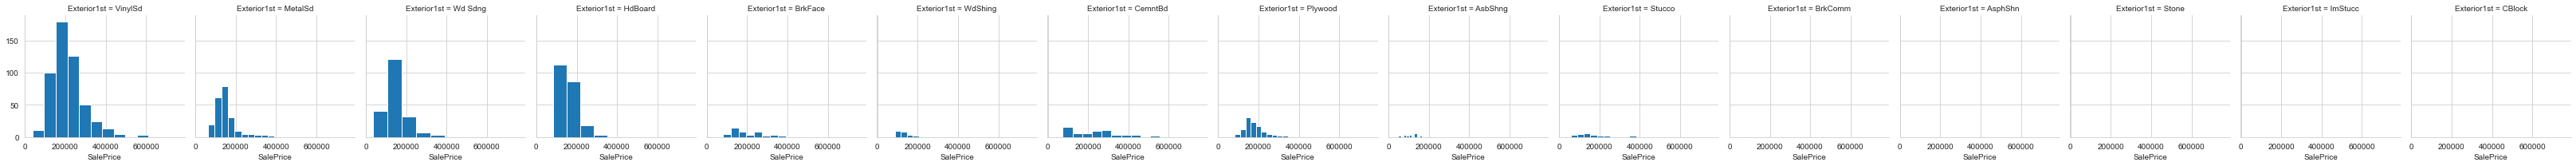

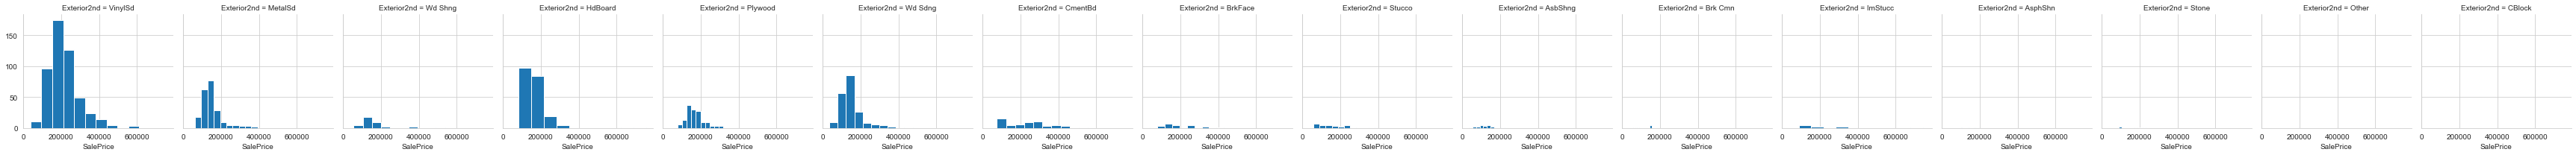

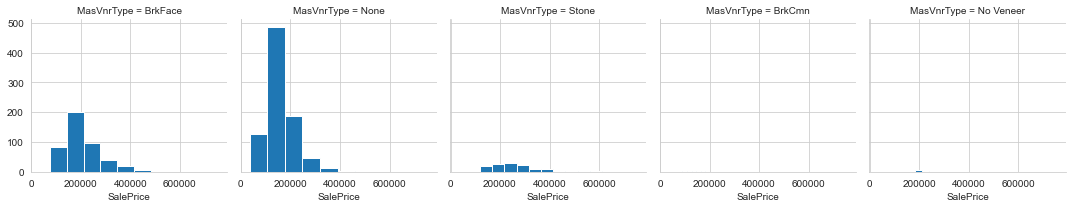

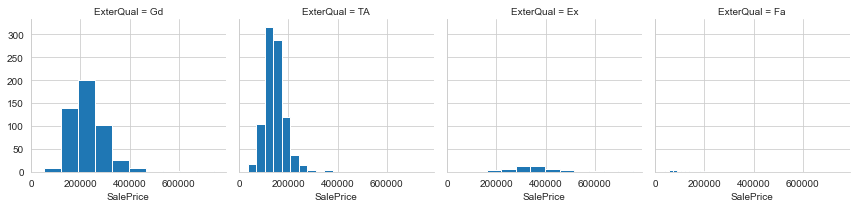

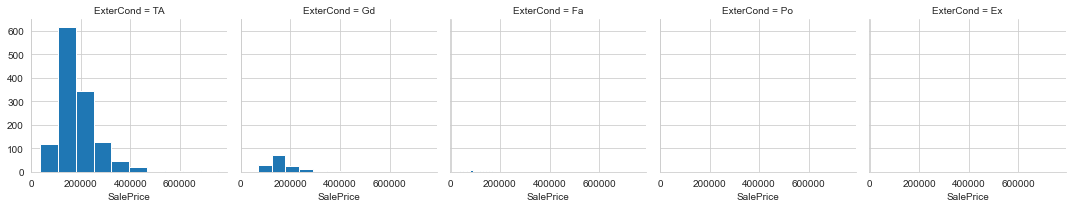

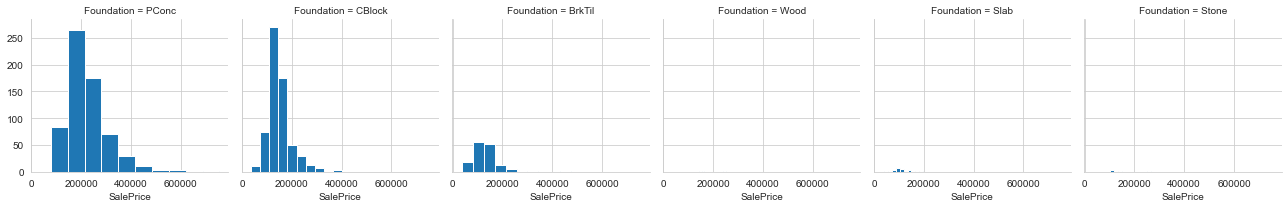

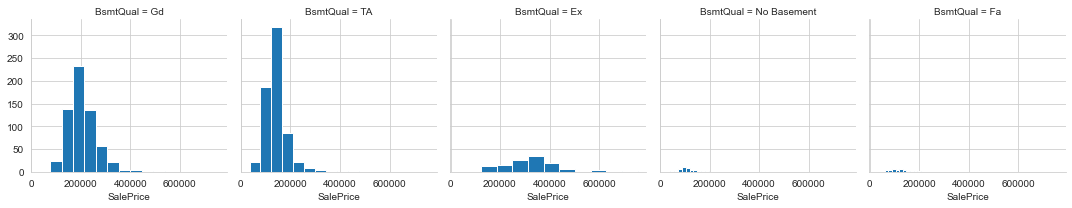

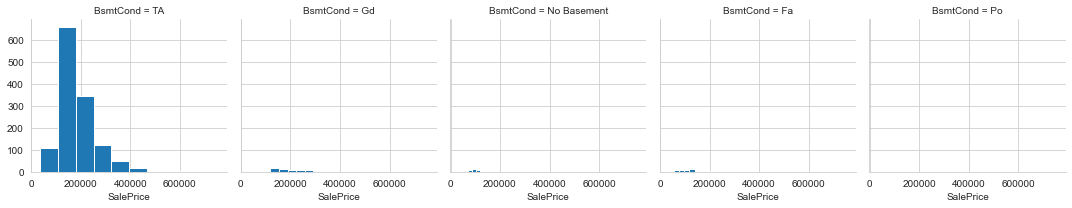

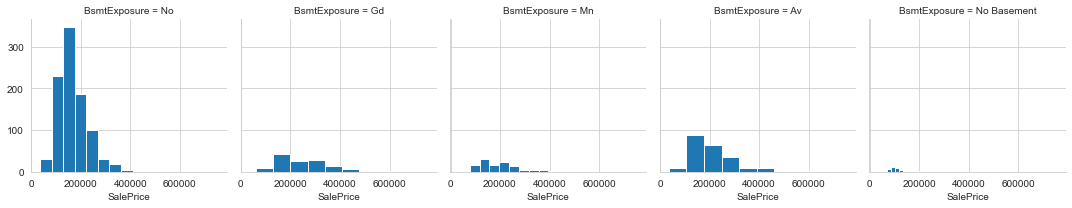

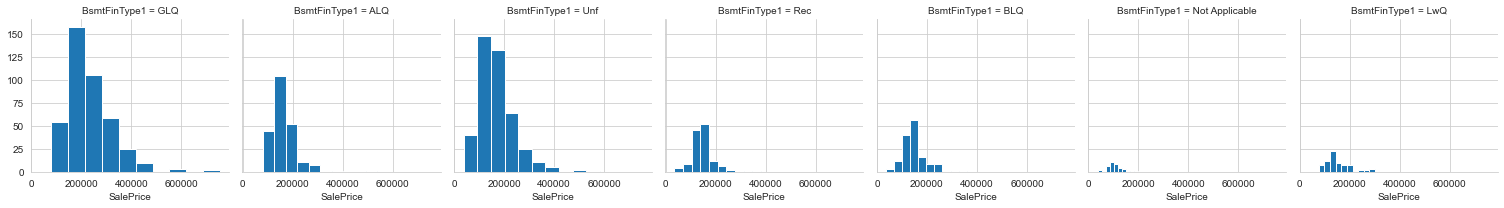

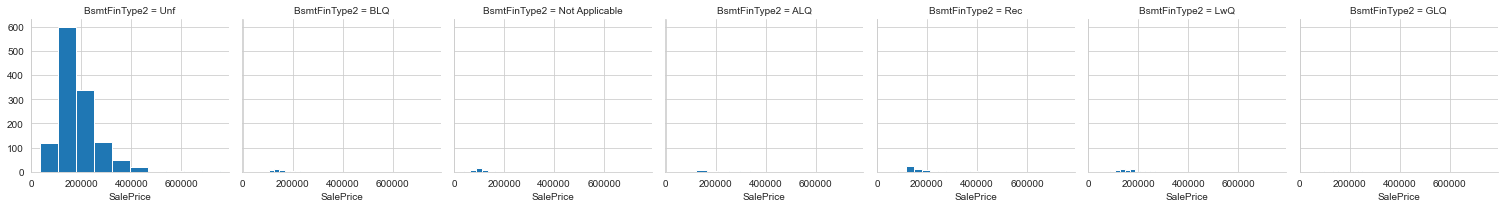

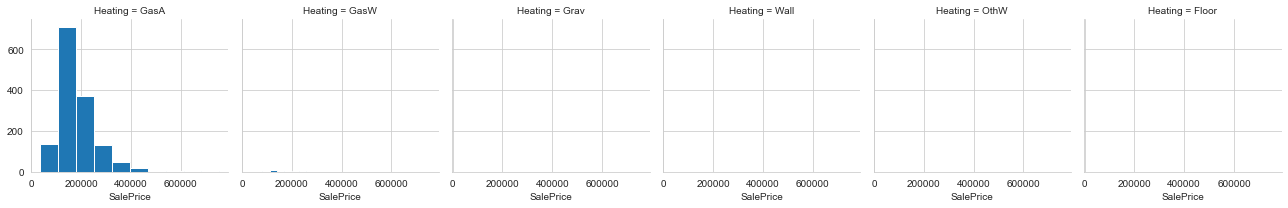

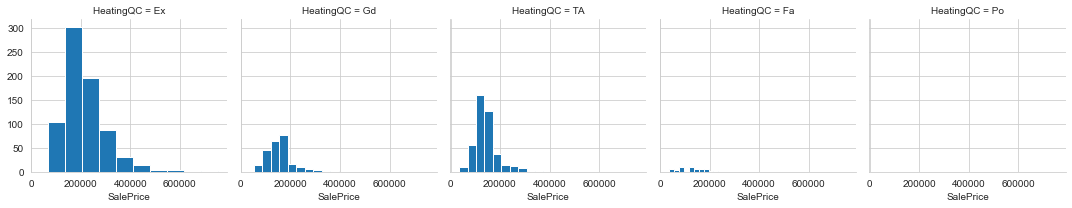

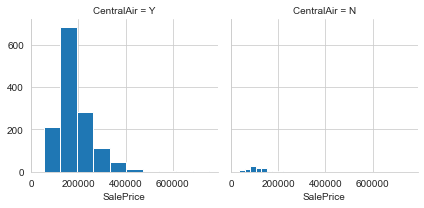

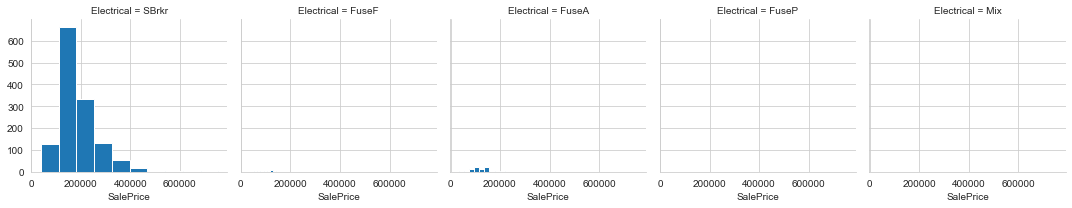

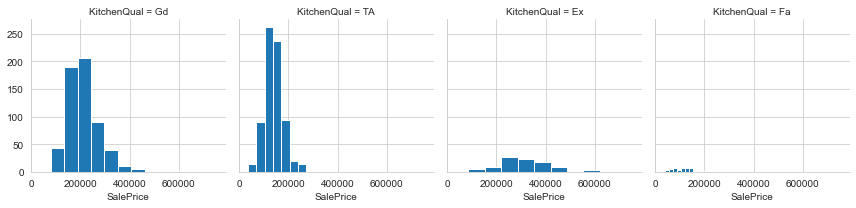

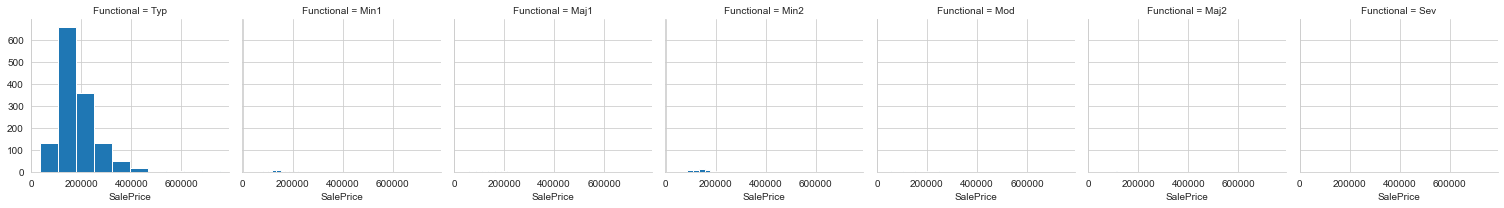

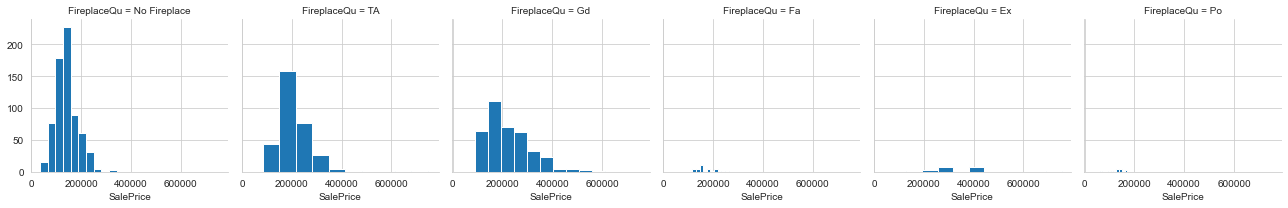

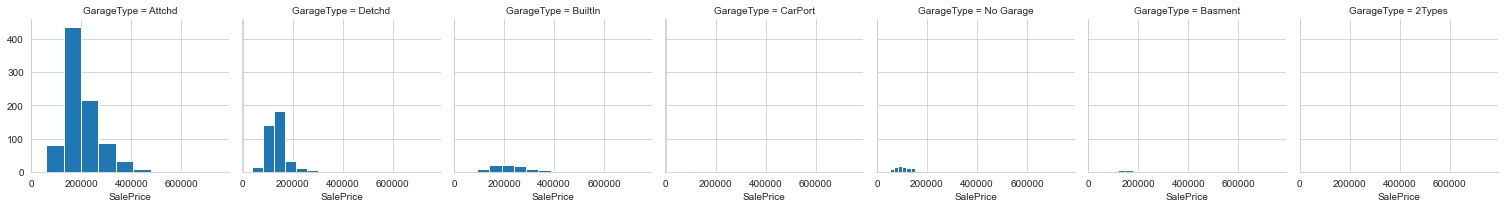

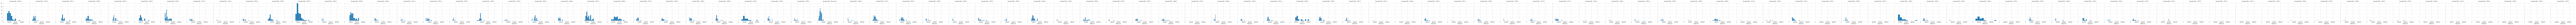

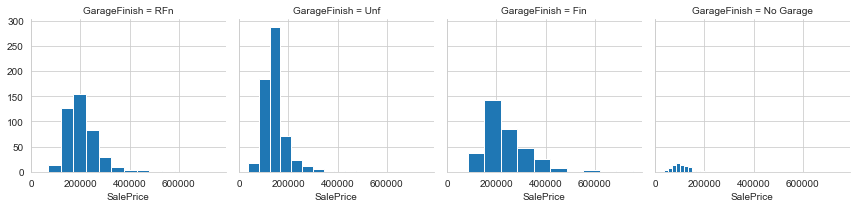

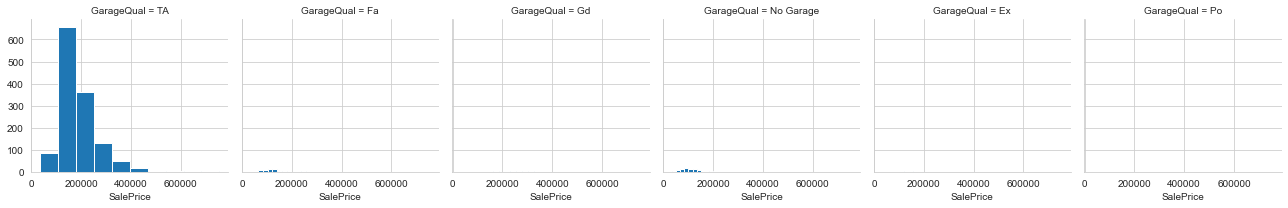

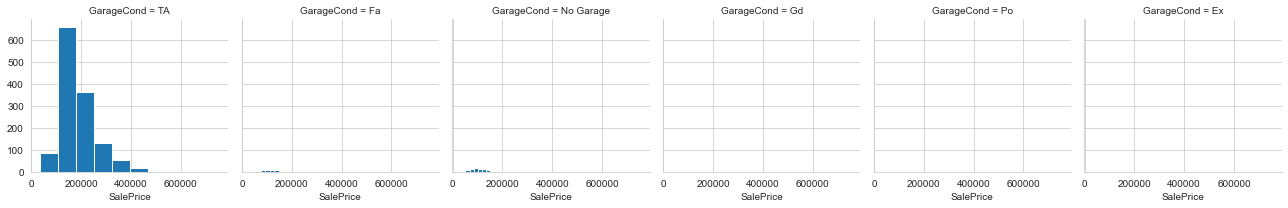

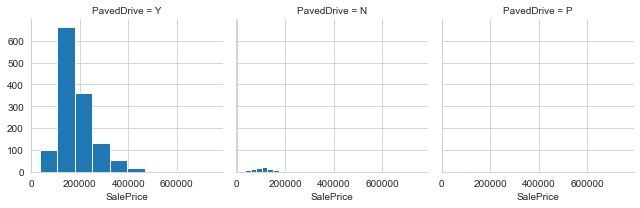

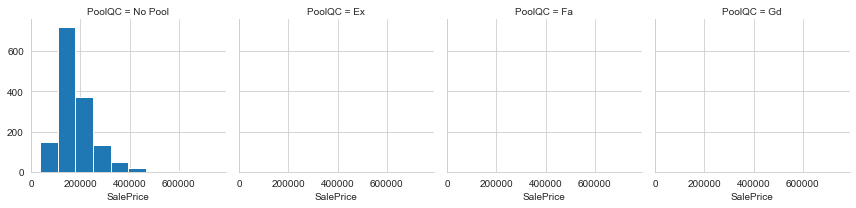

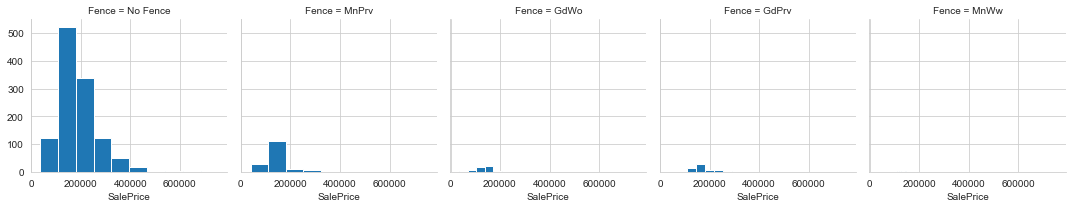

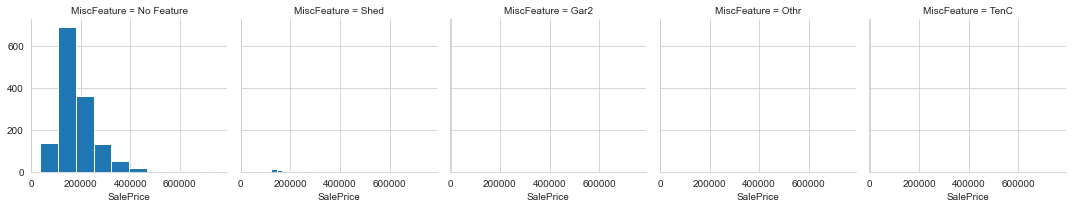

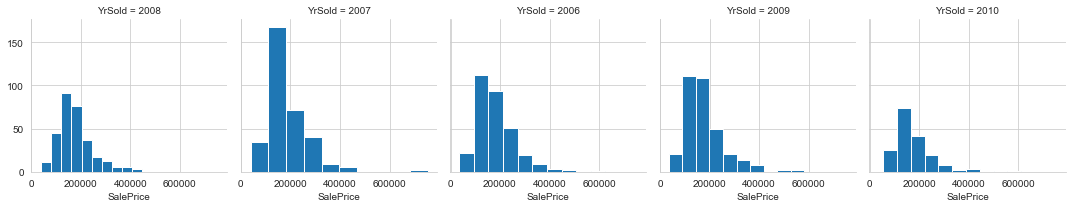

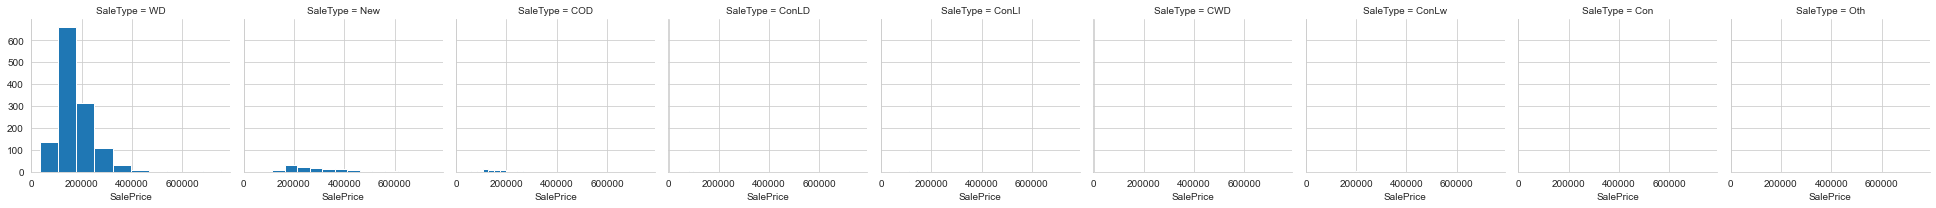

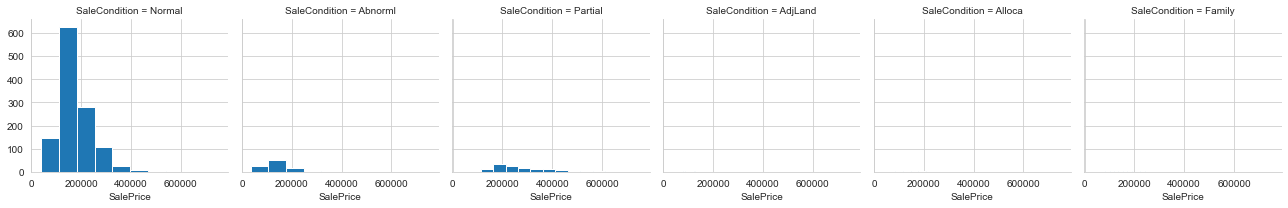

In [21]:
# Perform analysis for categorical vairbales

# Nothin looks untoward, sale prices look approximately normally distirbuted across each category

features = train_data.select_dtypes(include=['object']).columns

for features in features:
    g = sns.FacetGrid(train_data, col=features)
    g.map(plt.hist, 'SalePrice');

In [22]:
print(features)

SaleCondition


In [23]:
# Convert training and test data to one hot encoded numeric data
import sklearn
# Create a onehotencoder object that relables columns after transforming
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder


# Wrapper for one hot encoder to allow labelling of encoded variables
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(
            sparse_matrix.toarray(), columns=new_columns, index=X.index
        )
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f"{column}_<{self.categories_[i][j]}>")
                j += 1
        return new_columns


# Define funtion to encode categorrical variables with and rejoin to initial data


def transform(Train, df):

    # isolate categorical features
    cat_columns = df.select_dtypes(include=["object"]).columns
    cat_df = df[cat_columns]

    # isolate the numeric features
    numeric_df = df.select_dtypes(include=np.number)

    # initialise one hot encoder object spcify handle unknown and auto options to keep test and train same size
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    # Fit the endcoder to training data
    ohe.fit(Train[cat_columns])

    # transform input data
    df_processed = ohe.transform(cat_df)

    # concatinate numeric features from orginal tables with encoded features
    df_processed_full = pd.concat([df_processed, numeric_df], axis=1)

    return df_processed_full


# Transform training data to numeric form
Train_encoded = transform(train_data, train_data)
# Transform test data to numeric form
Test_encoded = transform(train_data, test_data)

# Check data sets are same width minus the two labels in Train
print("Test", Test_encoded.shape, "Train", Train_encoded.shape)

Test (1459, 607) Train (1460, 609)


# Machine Learning Models

In [24]:
# first model: decision tree

import time

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

x_train = Train_encoded.drop(columns=["Id", "SalePrice", "SalePrice_log"])
Y_train = Train_encoded.SalePrice_log

Now we are going to perform a 5-fold cross validation. We will write code to do this. 

In [25]:
## we define a function which will automate the cross-validation for us

def model_pipeline(model, param_grid, scoring):
    TunedModel = GridSearchCV(
        estimator = model, param_grid = param_grid, scoring = scoring, cv = 5
    )
    
    ## fit the model and time the process for tuning the hyperparameters
    start_time = time.process_time()
    
    TunedModel.fit(x_train, Y_train)
    
    # end of fit time
    
    print(time.process_time() - start_time, "Seconds")
    print("finished running model")
    return TunedModel
    

In [26]:
## generate results of best run

def plot_mean_scores(Tuned_Model, col, x, y, name):
    
    results = pd.DataFrame(Tuned_Model.cv_results_)
    results_best = results.loc[results.rank_test_score == 1]
    
    # initialize a grid of plots 
    sns.set(font_scale = 1.5)
    sns.set_style("darkgrid")
    col = col
    for col in col:
        grid  = sns.FacetGrid(
            results,
            col=col,
            hue="rank_test_score",
            palette="tab20c",
            legend_out=False,
            col_wrap=5,
            height=15,
        )
        
        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, y=0, ls=":", c=".5")

        # Draw marker on plot and decide what parameters to plot
        grid.map(sns.scatterplot, x, y, marker="o", s=200)

        # Adjust the arrangement of the plots
        grid.fig.tight_layout(w_pad=1)

        # Add legend to gird
        grid.add_legend()

    grid.savefig(name)

1.6880859999999984 Seconds
finished running model


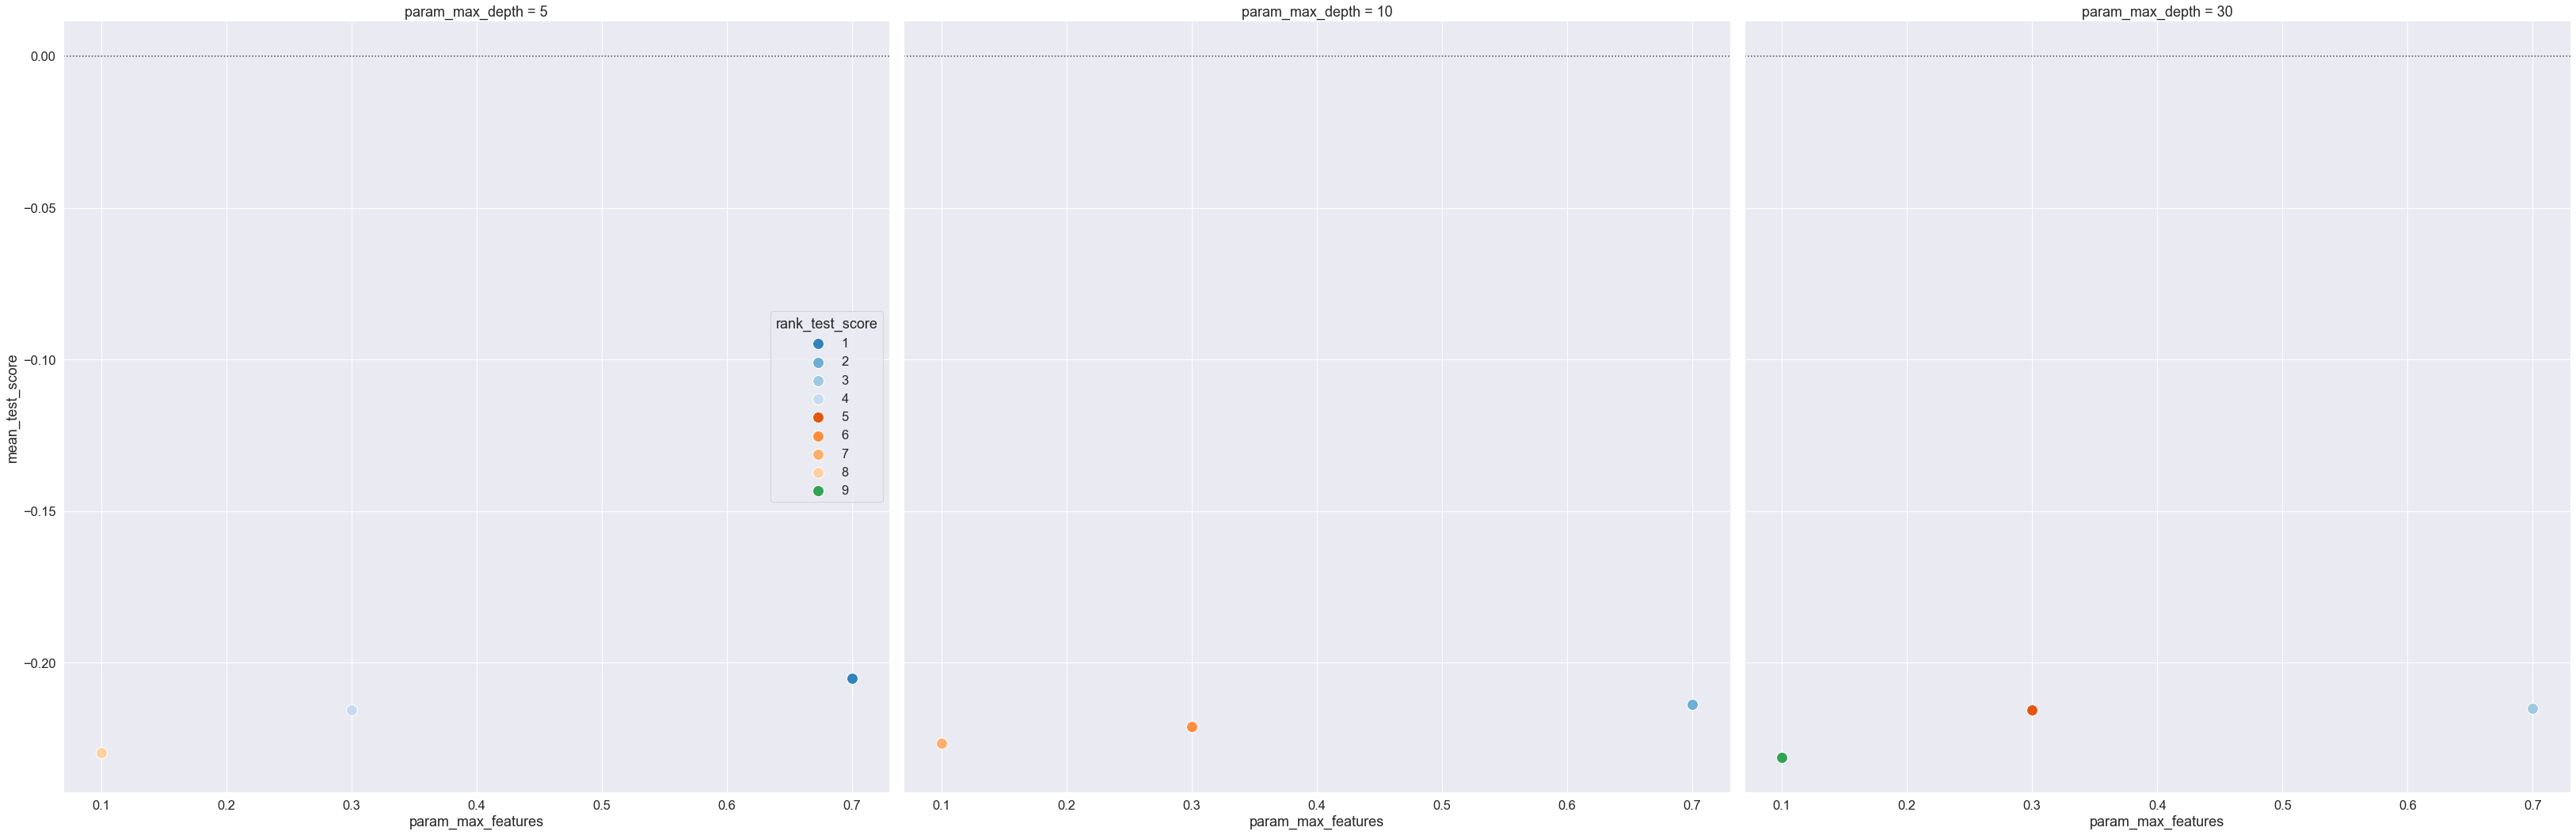

In [27]:
# Modelling

# Build a decision tree
# Set paramters for Grid Search CV
param_grid = {
    "max_depth": [5, 10, 30],
    "max_features": [0.1, 0.3, 0.7],
}
model = DecisionTreeRegressor(criterion="squared_error", random_state=0)

Tuned_Model = model_pipeline(model, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    Tuned_Model,
    ["param_max_depth"],
    "param_max_features",
    "mean_test_score",
    "DecisionTree",
)

Keep in mind that we trained the model with to predict SalesPrice_log. So to get the actual price predictions, we will need to exponentiate. 

In [36]:
x_test = Test_encoded.drop(columns = ["Id"])

In [37]:
y_pred = Tuned_Model.predict(x_test)

In [38]:
y_pred = np.exp(y_pred)
print(y_pred)

[131576.07236135 149906.10399898 172676.26417852 ... 149906.10399898
 107663.17754309 180402.71005058]


In [40]:
output = pd.DataFrame(data = {"Id": Test_encoded["Id"], "Prediction":y_pred})
output.to_csv(path_or_buf = "house-prices-advanced-regression-techniques/predictions.csv", index = False)